# Dataset Exploration with Public Bike datasets
## by (Seunggyun Han)

## Preliminary Wrangling

> In this project, I will investigate [NYC CitiBike trip dataset](https://s3.amazonaws.com/tripdata/index.html) from June to August in 2020. This data set includes information about individual rides made in NYC.

In [1]:
# import all packages and set plots to be embedded inline
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydeck

mapbox_key='---'

%matplotlib inline

In [2]:
# loading the datasets
df_bike_june = pd.read_csv('data/202006-citibike-tripdata.csv')
df_bike_july = pd.read_csv('data/202007-citibike-tripdata.csv')
df_bike_august = pd.read_csv('data/202008-citibike-tripdata.csv')

In [3]:
df_bike_june.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1062,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2
1,3810,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2
3,226,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2


In [4]:
# merge the datasets
df_bike = pd.concat([df_bike_june,df_bike_july,df_bike_august], axis=0, ignore_index=True)

In [5]:
del df_bike_june
del df_bike_july
del df_bike_august

In [6]:
gc.collect()

53

In [7]:
df_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1062,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2
1,3810,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2
3,226,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2


In [8]:
df_bike.shape

(6317595, 15)

In [9]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317595 entries, 0 to 6317594
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: float64(4), int64(6), object(5)
memory usage: 723.0+ MB


In [10]:
df_bike.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [11]:
# check the values briefly
print(df_bike['gender'].unique())
print(df_bike['usertype'].unique())
print(df_bike['birth year'].unique())

[2 0 1]
['Customer' 'Subscriber']
[1997 1969 1988 1990 1938 1995 1971 1989 1984 1996 1975 1982 1994 1973
 2000 1951 1985 1977 1986 1993 1992 1968 1967 2003 1970 1980 1964 2001
 1979 1987 1965 1999 1962 1981 1955 1998 1976 1991 2002 1978 1983 1958
 1972 1961 1960 1953 1966 1957 1974 1956 1959 1963 1954 1941 1948 1946
 1950 1900 1949 1947 1945 1952 1930 1940 1943 1939 1933 2004 1944 1934
 1942 1937 1887 1932 1935 1893 1891 1890 1931 1873 1897 1918 1885 1912
 1928 1896 1922 1936 1917 1901 1923 1888 1907 1909 1916 1886 1905 1889
 1898 1911 1920 1919 1899 1884 1910 1915 1879 1913 1895 1892 1929 1921
 1924 1926 1927 1914]


In [12]:
# remove records where birth year were less than 1920
df_bike = df_bike.loc[df_bike['birth year']>1920]

In [13]:
print(df_bike['birth year'].unique())

[1997 1969 1988 1990 1938 1995 1971 1989 1984 1996 1975 1982 1994 1973
 2000 1951 1985 1977 1986 1993 1992 1968 1967 2003 1970 1980 1964 2001
 1979 1987 1965 1999 1962 1981 1955 1998 1976 1991 2002 1978 1983 1958
 1972 1961 1960 1953 1966 1957 1974 1956 1959 1963 1954 1941 1948 1946
 1950 1949 1947 1945 1952 1930 1940 1943 1939 1933 2004 1944 1934 1942
 1937 1932 1935 1931 1928 1922 1936 1923 1929 1921 1924 1926 1927]


In [14]:
# change datatype of time columns as np.datetime64
df_bike['starttime'] = pd.to_datetime(df_bike['starttime'])
df_bike['stoptime'] = pd.to_datetime(df_bike['stoptime'])

In [15]:
# extract features from the columns
df_bike['dayofweek'] = df_bike['starttime'].dt.dayofweek
df_bike['starthour'] = df_bike['starttime'].dt.hour
df_bike['stophour'] = df_bike['stoptime'].dt.hour

In [16]:
df_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,dayofweek,starthour,stophour
0,1062,2020-06-01 00:00:03.372,2020-06-01 00:17:46.208,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,0,0,0
1,3810,2020-06-01 00:00:03.553,2020-06-01 01:03:33.936,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,0,0,1
2,1017,2020-06-01 00:00:09.614,2020-06-01 00:17:06.833,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,0,0,0
3,226,2020-06-01 00:00:12.178,2020-06-01 00:03:58.864,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,0,0,0
4,1437,2020-06-01 00:00:21.255,2020-06-01 00:24:18.965,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,0,0,0


In [17]:
df_bike.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'dayofweek', 'starthour', 'stophour'],
      dtype='object')

In [18]:
df_bike.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,dayofweek,starthour,stophour
count,6.314042e+06,6.314042e+06,6.314042e+06,6.314042e+06,6.314042e+06,6.314042e+06,6.314042e+06,6.314042e+06,6.314042e+06,6.314042e+06,6.314042e+06,6.314042e+06,6.314042e+06
mean,1.533878e+03,2.068590e+03,4.074025e+01,-7.397615e+01,2.061690e+03,4.073982e+01,-7.397632e+01,3.444146e+04,1.981692e+03,1.170808e+00,3.083167e+00,1.458771e+01,1.477695e+01
std,1.697142e+04,1.538104e+03,3.555434e-02,2.366751e-02,1.539276e+03,3.547587e-02,2.373733e-02,8.988886e+03,1.206211e+01,6.363325e-01,2.019321e+00,4.790525e+00,4.906419e+00
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.407146e+01,1.452900e+04,1.921000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.930000e+02,4.260000e+02,4.071582e+01,-7.399384e+01,4.260000e+02,4.071560e+01,-7.399393e+01,2.858700e+04,1.969000e+03,1.000000e+00,1.000000e+00,1.100000e+01,1.200000e+01
50%,9.140000e+02,3.096000e+03,4.073932e+01,-7.398068e+01,3.093000e+03,4.073827e+01,-7.398086e+01,3.749100e+04,1.985000e+03,1.000000e+00,3.000000e+00,1.500000e+01,1.600000e+01
75%,1.577000e+03,3.490000e+03,4.076440e+01,-7.395901e+01,3.486000e+03,4.076371e+01,-7.395903e+01,4.173400e+04,1.991000e+03,2.000000e+00,5.000000e+00,1.800000e+01,1.800000e+01
max,3.522382e+06,4.124000e+03,4.085225e+01,-7.389795e+01,4.124000e+03,4.085225e+01,-7.389795e+01,4.684000e+04,2.004000e+03,2.000000e+00,6.000000e+00,2.300000e+01,2.300000e+01


### What is the structure of your dataset?

> The dataset includes 6,317,595 entries and 16 columns. Each row contains information about time (start time, end time, and duration), location (start and end stations), and personal information (birth year and gender) of riders.

### What is/are the main feature(s) of interest in your dataset?

> distribution of the trip durations, temporal distribution of the trips (time of day, and day of the week), spatial distribution of the trips (locations of start and end stations), and distribution in terms of gender of the riders and age of the riders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> `tripduration`, `hour`, `dayofweek`, `start station latitude`, `start station longitude`, `end station latitude`, `end station longitude`, `gender`

## Univariate Exploration

### Trip duration

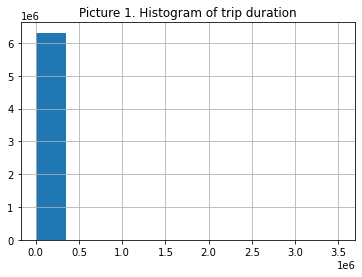

In [19]:
# plot a histogram
plt.title('Picture 1. Histogram of trip duration')
df_bike['tripduration'].hist()

In [20]:
df_bike['tripduration'].quantile(0.99)

6517.0

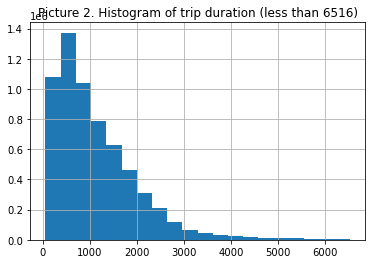

In [21]:
plt.title('Picture 2. Histogram of trip duration (less than 6516)')
df_bike.loc[df_bike['tripduration']<6517]['tripduration'].hist(bins=20)

In [22]:
log_data = np.log10(df_bike['tripduration'])
log_bin_edges = np.arange(0.5, log_data.max()+0.2, 0.1)

Text(0.5, 0, 'log(values)')

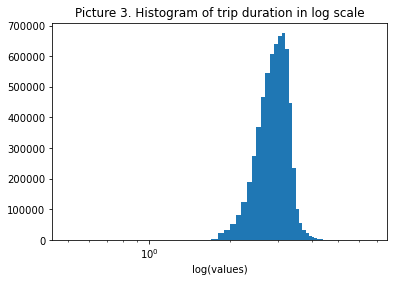

In [23]:
plt.title('Picture 3. Histogram of trip duration in log scale')
plt.xscale('log')
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(values)')

> **Summary**<br><br> 
When I tried to draw a histogram without any transformation or scaling, it was very hard to see any distribution in the histogram (Picture 1). Therefore I tried two different ways to get some insight. First, I truncated values that are more than 99% percentile (6516) of the trip durations (Picture 2). Second, I tried to draw a histogram with a log-scaled x-axis (Picture 3).  <br><br>
In Picture 2, the distribution of the trip durations looks left-skewed. Otherwise, the log-scaled histogram (Picture 3) looks more normally distributed. 

### Gender

In [24]:
# print the ratios of each gender to the entire dataset.
df_bike['gender'].value_counts() / df_bike['gender'].value_counts().sum()

1    0.565905
2    0.302451
0    0.131643
Name: gender, dtype: float64

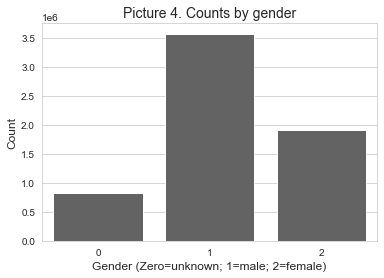

In [25]:
# plot the bar chart
sns.set_style('whitegrid')
sns.countplot(df_bike['gender'], color='#636363')
plt.title('Picture 4. Counts by gender', fontsize=14)
plt.xlabel('Gender (Zero=unknown; 1=male; 2=female)', fontsize=12);
plt.ylabel('Count', fontsize=12);

> **Summary**<br><br>
Compared with the others, trips by male riders make up the largest portion (56%). The number of trips by female riders (30%) is about half of the number of trips by male riders. The number of trips by 'unknown' category is around 13% of the number of the entire rows.

### User Type

In [26]:
# print the ratios of each usertype to the entire dataset.
df_bike['usertype'].value_counts() / df_bike['usertype'].value_counts().sum()

Subscriber    0.713689
Customer      0.286311
Name: usertype, dtype: float64

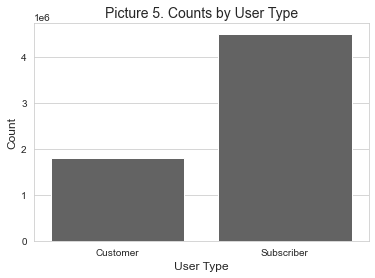

In [27]:
sns.set_style('whitegrid')
sns.countplot(df_bike['usertype'], color='#636363')
plt.title('Picture 5. Counts by User Type', fontsize=14)
plt.xlabel('User Type', fontsize=12);
plt.ylabel('Count', fontsize=12);

> The number of trips by subscribers is more than two times of the number of trips by the customer category.

### Hour

In [28]:
# print the ratios of each time to the entire dataset.
df_bike['starthour'].value_counts() / df_bike['starthour'].value_counts().sum()

17    0.095481
18    0.095453
19    0.079803
16    0.078928
15    0.071077
14    0.065371
13    0.061805
12    0.057898
20    0.056962
11    0.049490
10    0.043239
9     0.041938
8     0.041751
21    0.036600
7     0.029573
22    0.026610
23    0.019253
6     0.016681
0     0.011561
1     0.006908
5     0.005237
2     0.003996
3     0.002342
4     0.002044
Name: starthour, dtype: float64

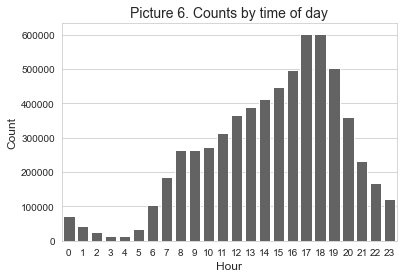

In [29]:
sns.set_style('whitegrid')
sns.countplot(df_bike['starthour'], color='#636363')
plt.title('Picture 6. Counts by time of day', fontsize=14)
plt.xlabel('Hour', fontsize=12);
plt.ylabel('Count', fontsize=12);

> **Summary**  
The number of trips is peaked at 5 and 6 p.m. Also, there are fewer trips at 3 or 4 a.m than the other times.

### Day of week

In [30]:
# print the ratios of each day of week to the entire dataset.
df_bike['dayofweek'].value_counts() / df_bike['dayofweek'].value_counts().sum()

5    0.161769
6    0.151262
0    0.139578
3    0.138344
1    0.136965
2    0.136787
4    0.135295
Name: dayofweek, dtype: float64

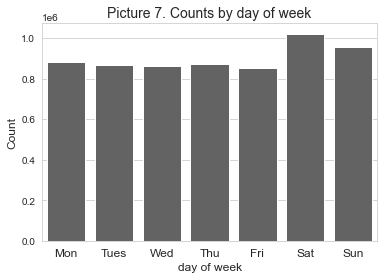

In [31]:
sns.set_style('whitegrid')
sns.countplot(df_bike['dayofweek'], color='#636363')
plt.title('Picture 7. Counts by day of week', fontsize=14)
plt.xlabel('day of week', fontsize=12);
plt.ylabel('Count', fontsize=12);
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun'],fontsize='12');

> **Summary** <br><br>The numbers of the trips in weekdays are less than weekends.

### Start station

Here, I will draw the heatmap with pydeck library.

In [32]:
df_bike_station = df_bike.groupby('start station id').mean()[['start station latitude', 'start station longitude']]
df_bike_station = df_bike_station.rename(columns={
    'start station latitude':'lat',
    'start station longitude':'lng'
})

In [33]:
df_bike_station_count = df_bike.groupby('start station id').count()[['tripduration']].rename(columns={'tripduration':'startcount'})

In [34]:
df_bike_station = df_bike_station.join(df_bike_station_count)

In [35]:
# set the layer of deck.gl
layer_start_static = pydeck.Layer(
    "HeatmapLayer",
    data=df_bike_station,
    opacity=0.7,
    get_position=['lng', 'lat'],
    aggregation = '"MEAN"',
    get_weight='startcount',
)

In [36]:
# set the view point
view = pydeck.ViewState(longitude = df_bike_station['lng'].mean(), latitude = df_bike_station['lat'].mean())
view.zoom = 11

In [37]:
# draw a map
r_start_static = pydeck.Deck(
    layers=[layer_start_static],
    initial_view_state= view,
    mapbox_key=mapbox_key,
)

In [38]:
r_start_static.show()

DeckGLWidget(google_maps_key=None, json_input='{"initialViewState": {"latitude": 40.743106025503984, "longitud…

### End station

In [39]:
# calculate the number of the ridings of each end stations
df_bike_station_count = df_bike.groupby('end station id').count()[['tripduration']].rename(columns={'tripduration':'count'})
df_bike_station = df_bike_station.merge(df_bike_station_count, left_index=True, right_index=True)
df_bike_station = df_bike_station.rename(columns={'count':'endcount'})

In [40]:
df_bike_station.head()

,lat,lng,startcount,endcount
72,40.767272,-73.993929,12200,12086
79,40.719116,-74.006667,5613,5678
82,40.711174,-74.000165,3635,3722
83,40.683826,-73.976323,6465,6662
116,40.741776,-74.001497,14703,14787


In [41]:
layer_end_static = pydeck.Layer(
    "HeatmapLayer",
    data=df_bike_station,
    opacity=0.7,
    get_position=['lng', 'lat'],
    aggregation = '"MEAN"',
    get_weight='endcount',
)

In [42]:
r_end_static = pydeck.Deck(
    layers=[layer_end_static],
    initial_view_state= view,
    mapbox_key=mapbox_key,
)
r_end_static.show()

DeckGLWidget(google_maps_key=None, json_input='{"initialViewState": {"latitude": 40.743106025503984, "longitud…

>**Summary**<br><br>
Spatial distributions of start and end stations look very similar. Most of the ridings are located at Midtown.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In the `birth year` column, there are several unusual points like 1890. Therefore, I chose the records where the birth year are bigger than 1920.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the start time and end time columns were set as string data type. So, `pd.to_datetime` function was used to transform. The **Trip duration** column is extremely left-skewed. The log transform is needed.

---

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### trip duration & gender

In [43]:
df_bike_male = df_bike.loc[df_bike['gender']==1]
df_bike_female = df_bike.loc[df_bike['gender']==2]

In [44]:
# set the log bins for kde plots
log_bin_edges = np.arange(0.5, log_data.max()+0.2, 0.1)

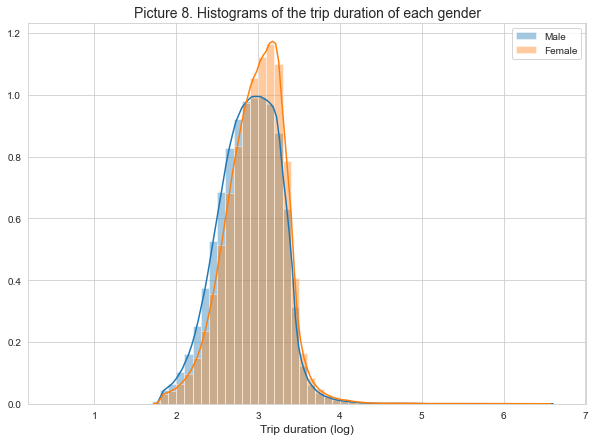

In [45]:
# draw the kde plots
plt.figure(figsize=(10,7))
sns.distplot(np.log10(df_bike_male['tripduration']), bins=log_bin_edges, label='Male')
sns.distplot(np.log10(df_bike_female['tripduration']),bins = log_bin_edges, label='Female')
plt.legend()
plt.title('Picture 8. Histograms of the trip duration of each gender', fontsize=14);
plt.xlabel('Trip duration (log)', fontsize=12);

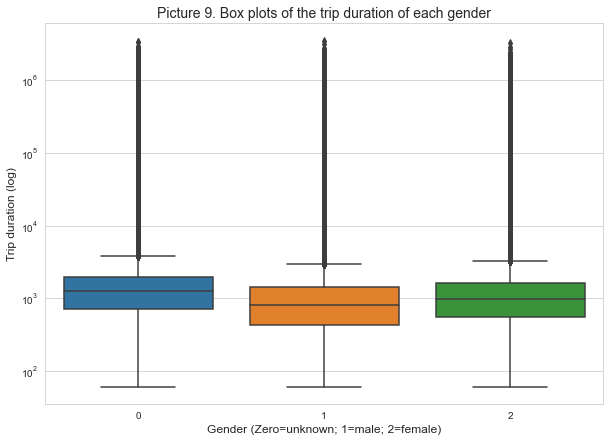

In [46]:
plt.figure(figsize=(10,7))
plt.title('Picture 9. Box plots of the trip duration of each gender', fontsize=14);
sns.boxplot(x='gender', y='tripduration', data=df_bike)
plt.yscale('log')
plt.xlabel('Gender (Zero=unknown; 1=male; 2=female)', fontsize=12);
plt.ylabel('Trip duration (log)', fontsize=12);

### Trip duration & User Type

In [47]:
df_bike_subscriber = df_bike.loc[df_bike['usertype']=='Subscriber']
df_bike_customer = df_bike.loc[df_bike['usertype']=='Customer']

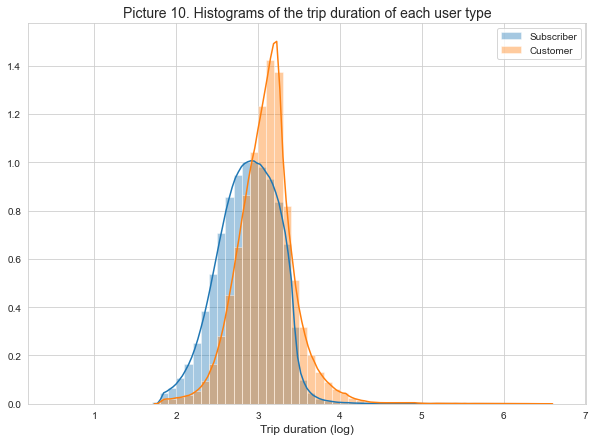

In [48]:
plt.figure(figsize=(10,7))
sns.distplot(np.log10(df_bike_subscriber['tripduration']), bins=log_bin_edges, label='Subscriber')
sns.distplot(np.log10(df_bike_customer['tripduration']),bins = log_bin_edges, label='Customer')
plt.legend()
plt.title('Picture 10. Histograms of the trip duration of each user type', fontsize=14);
plt.xlabel('Trip duration (log)', fontsize=12);

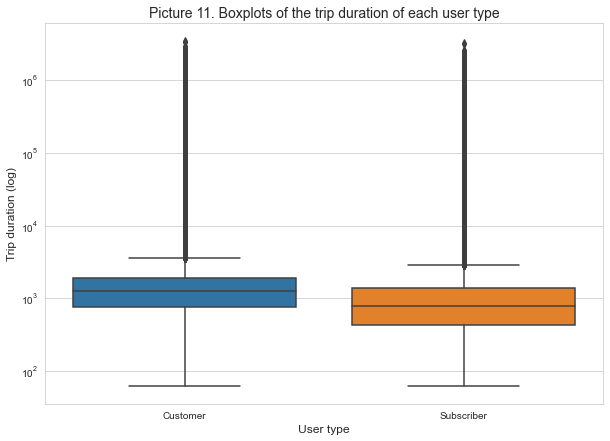

In [49]:
plt.figure(figsize=(10,7))
plt.title('Picture 11. Boxplots of the trip duration of each user type', fontsize=14);
sns.boxplot(x='usertype', y='tripduration', data=df_bike)
plt.yscale('log')
plt.ylabel('Trip duration (log)', fontsize=12);
plt.xlabel('User type', fontsize=12);

### Trip duration & time of day

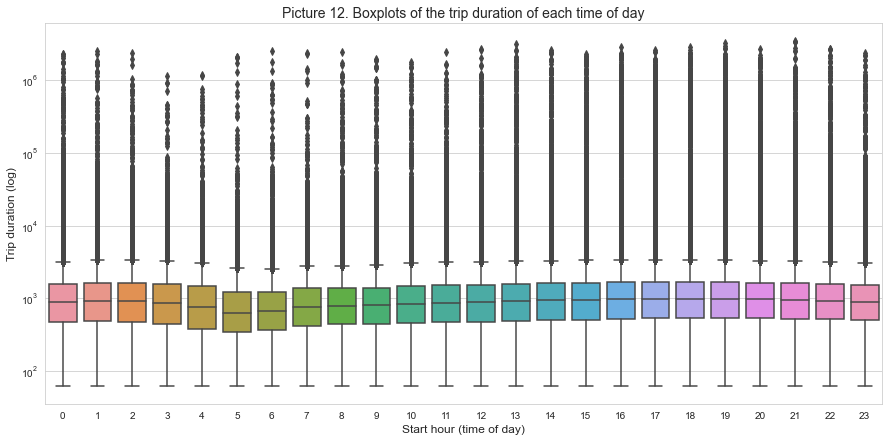

In [50]:
plt.figure(figsize=(15,7))
plt.title('Picture 12. Boxplots of the trip duration of each time of day', fontsize=14);
sns.boxplot(x='starthour', y='tripduration', data=df_bike)
plt.yscale('log')
plt.ylabel('Trip duration (log)', fontsize=12);
plt.xlabel('Start hour (time of day)', fontsize=12);

### Trip duration & day of week

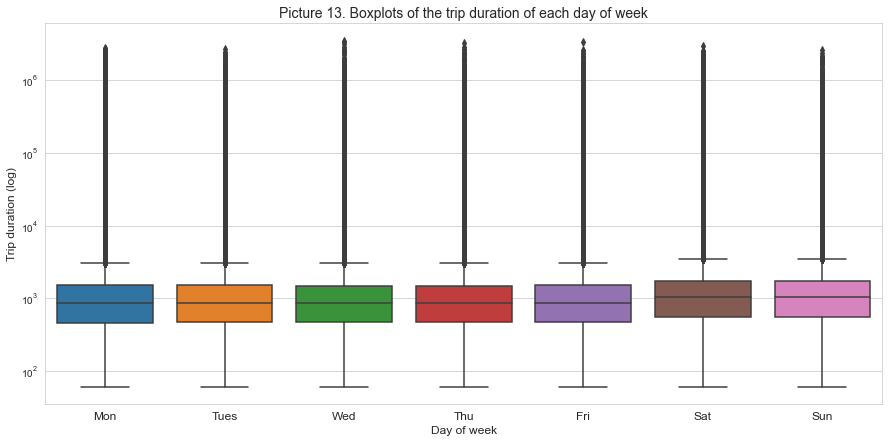

In [51]:
plt.figure(figsize=(15,7))
plt.title('Picture 13. Boxplots of the trip duration of each day of week', fontsize=14);
sns.boxplot(x='dayofweek', y='tripduration', data=df_bike)
plt.yscale('log')
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun'],fontsize='12');
plt.ylabel('Trip duration (log)', fontsize=12);
plt.xlabel('Day of week', fontsize=12);

### Gender & User Type

In [52]:
# calculate the numbers of trips per each gender and user type
df_bike_count = df_bike.groupby(['usertype',
                                 'gender'],
                                 as_index=False).count()[['usertype',
                                                          'gender',
                                                          'tripduration']].rename(columns={'tripduration':'count'})

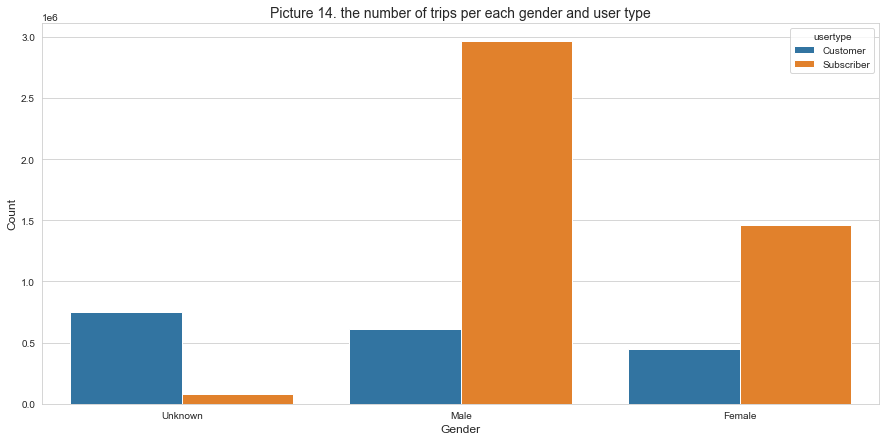

In [53]:
plt.figure(figsize=(15,7))
plt.title('Picture 14. the number of trips per each gender and user type', fontsize=14);
sns.barplot(data=df_bike_count, x='gender', y='count', hue='usertype');
plt.xticks(ticks=[0,1,2], labels=['Unknown','Male','Female']);
plt.xlabel('Gender', fontsize=12);
plt.ylabel('Count', fontsize=12);

### dayofweek & Gender

In [54]:
# calculate the numbers of trips per each gender and day of week
df_bike_count = df_bike.groupby(['dayofweek',
                                 'gender'],
                                 as_index=False).count()[['dayofweek',
                                                          'gender',
                                                          'tripduration']].rename(columns={'tripduration':'count'})

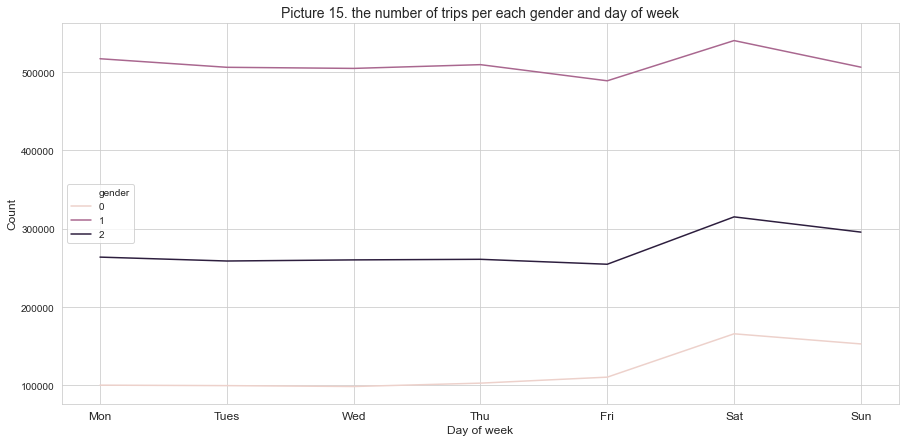

In [55]:
plt.figure(figsize=(15,7))
plt.title('Picture 15. the number of trips per each gender and day of week', fontsize=14);
sns.lineplot(data=df_bike_count, x='dayofweek', y='count', hue='gender');
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun'],fontsize='12');
plt.xlabel('Day of week', fontsize=12);
plt.ylabel('Count', fontsize=12);

### dayofweek & usertype

In [56]:
# calculate the numbers of trips per each user type and day of week
df_bike_count = df_bike.groupby(['dayofweek',
                                 'usertype'],
                                 as_index=False).count()[['dayofweek',
                                                          'usertype',
                                                          'tripduration']].rename(columns={'tripduration':'count'})

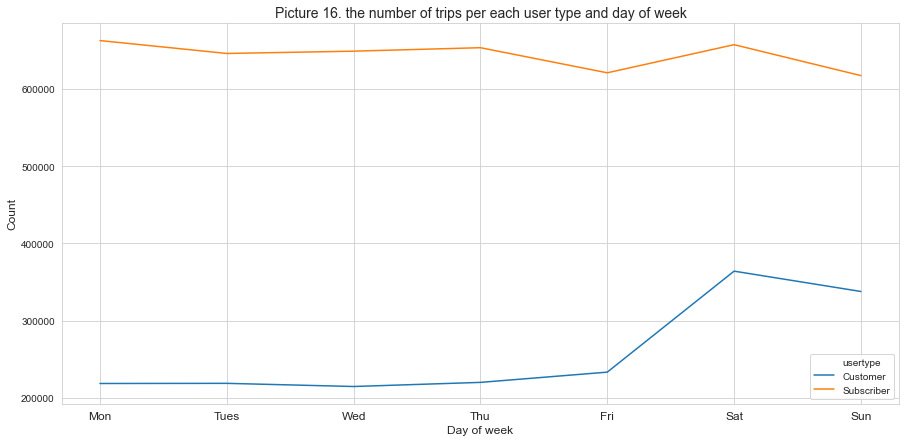

In [57]:
plt.figure(figsize=(15,7))
plt.title('Picture 16. the number of trips per each user type and day of week', fontsize=14);
sns.lineplot(data=df_bike_count, x='dayofweek', y='count', hue='usertype');
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun'],fontsize='12');
plt.xlabel('Day of week', fontsize=12);
plt.ylabel('Count', fontsize=12);

### start hour & usertype

In [58]:
# calculate the numbers of trips per each gender and start hour (time of day)
df_bike_count = df_bike.groupby(['starthour',
                                 'gender'],
                                 as_index=False).count()[['starthour',
                                                          'gender',
                                                          'tripduration']].rename(columns={'tripduration':'count'})

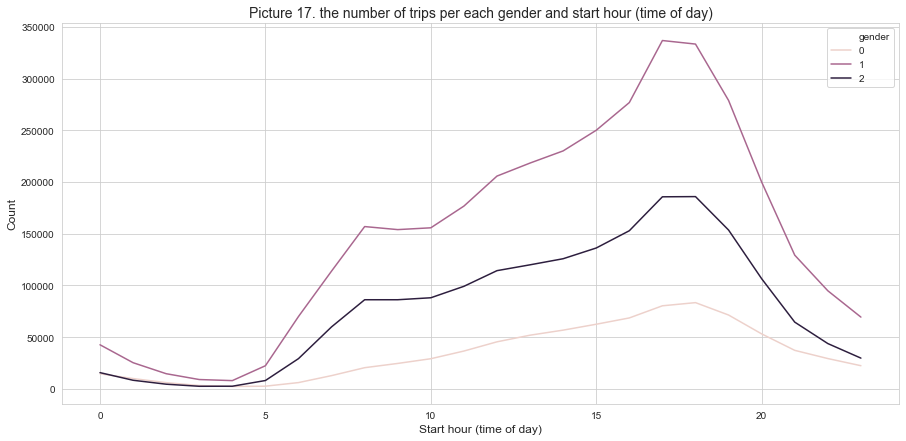

In [59]:
plt.figure(figsize=(15,7))
plt.title('Picture 17. the number of trips per each gender and start hour (time of day)', fontsize=14);
sns.lineplot(data=df_bike_count, x='starthour', y='count', hue='gender');
plt.xlabel('Start hour (time of day)', fontsize=12);
plt.ylabel('Count', fontsize=12);

In [60]:
# calculate the numbers of trips per each user type and start hour (time of day)
df_bike_count = df_bike.groupby(['starthour',
                                 'usertype'],
                                 as_index=False).count()[['starthour',
                                                          'usertype',
                                                          'tripduration']].rename(columns={'tripduration':'count'})

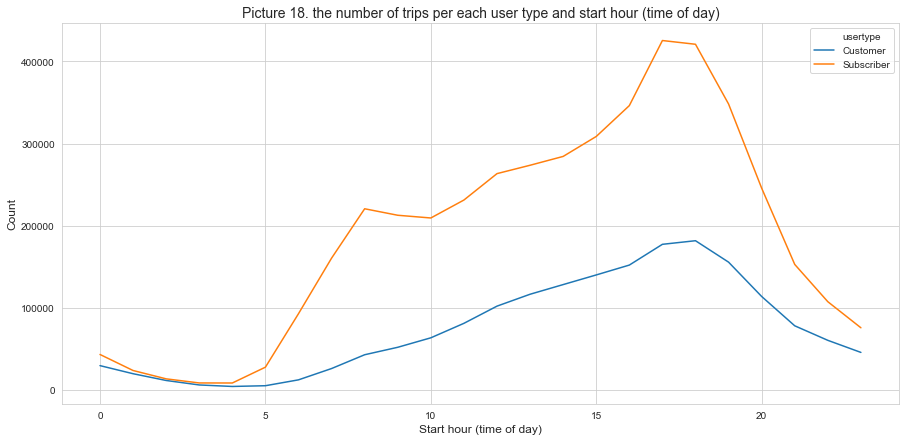

In [61]:
plt.figure(figsize=(15,7))
plt.title('Picture 18. the number of trips per each user type and start hour (time of day)', fontsize=14);
sns.lineplot(data=df_bike_count, x='starthour', y='count', hue='usertype');
plt.xlabel('Start hour (time of day)', fontsize=12);
plt.ylabel('Count', fontsize=12);

### Start station & start hour

this section is for drawing a simple heatmap with interactive slider. User can explore spatial distribution of the number of trips per each start station by using the slider of time of day.

In [62]:
# calculate the number of trips per each start hour and start station
df_startStation_hour = df_bike.groupby(['start station id',
                                   'starthour'], as_index=False).count()
df_startStation_hour = df_startStation_hour[['start station id',
                                  'starthour',
                                  'bikeid']].rename(columns={'bikeid':'count'})

In [63]:
# merge the dataset with coordinates
df_startStation_hour = df_startStation_hour.merge(df_bike_station[['lat','lng']], left_on='start station id', right_index=True)

In [64]:
# make layer of the heatmap
layer_start_hour = pydeck.Layer(
    "HeatmapLayer",
    data=df_startStation_hour.loc[df_startStation_hour['starthour']==0],
    opacity=0.7,
    get_position=['lng', 'lat'],
    aggregation = '"MEAN"',
    get_weight='count',
    pickable=False,
    get_radius=800
)

In [65]:
# make a slider for an interaction (slider for time of day)
import ipywidgets as widgets
from IPython.display import display

slider_start = widgets.IntSlider(0, min=0, max=23, step=1)

def on_change_start(v):
    result = df_startStation_hour.loc[df_startStation_hour['starthour']==slider_start.value].to_dict(orient='records')
    layer_start_hour.data=result
    r_start.update()

In [66]:
# draw the map
r_start = pydeck.Deck(
    layers=[layer_start_hour],
    initial_view_state= view,
    mapbox_key=mapbox_key,
)
r_start.show()

DeckGLWidget(google_maps_key=None, json_input='{"initialViewState": {"latitude": 40.743106025503984, "longitud…

In [67]:
slider_start.observe(on_change_start, names='value')
display(slider_start)

IntSlider(value=0, max=23)

### End station & end hour

In [68]:
# calculate the number of trips per each end hour and end station
df_endStation_hour = df_bike.groupby(['end station id',
                                   'stophour'], as_index=False).count()
df_endStation_hour = df_endStation_hour[['end station id',
                                  'stophour',
                                  'bikeid']].rename(columns={'bikeid':'count'})

In [69]:
# merge the dataset with coordinates
df_endStation_hour = df_endStation_hour.merge(df_bike_station[['lat','lng']], left_on='end station id', right_index=True)

In [70]:
# make layer of the heatmap
layer_end_hour = pydeck.Layer(
    "HeatmapLayer",
    data=df_endStation_hour.loc[df_endStation_hour['stophour']==0],
    opacity=0.7,
    get_position=['lng', 'lat'],
    aggregation = '"MEAN"',
    get_weight='count',
    pickable=False,
    get_radius=800
)

# make a slider for an interaction (slider for time of day)
slider_end = widgets.IntSlider(0, min=0, max=23, step=1)

def on_change_end(v):
    result = df_endStation_hour.loc[df_endStation_hour['stophour']==slider_end.value].to_dict(orient='records')
    layer_end_hour.data=result
    r_end.update()

# draw the map
r_end = pydeck.Deck(layers=[layer_end_hour],
                    initial_view_state= view,
                    mapbox_key=mapbox_key)
r_end.show()

DeckGLWidget(google_maps_key=None, json_input='{"initialViewState": {"latitude": 40.743106025503984, "longitud…

In [71]:
slider_end.observe(on_change_end, names='value')
display(slider_end)

IntSlider(value=0, max=23)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. In terms of 'gender', in the 'Unknown' class, the number of customers is more than the number of subscribers. In the 'Male' or 'Female' class, the number of subscribers is more than the number of customers. <br>
2. The number of trips by subscribers per each day of the week slightly fluctuated, but not changed rapidly. However, the number of trips by customers was rapidly increased on Saturday. <br>
3. Changes in the number of ridings by each gender look similar.<br>
4. The numbers of ridings by Customer and Subscriber were slightly similar. However, ridings by subscribers were rapidly increased at 8 a. m.<br>
5. Spatial distributions of start stations and end stations were different at each time of hours. The places such as 'Union Square', 'Time Square', and 'Grand Central' were identified as hot spots of ridings.<br>

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [72]:
df_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,dayofweek,starthour,stophour
0,1062,2020-06-01 00:00:03.372,2020-06-01 00:17:46.208,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,0,0,0
1,3810,2020-06-01 00:00:03.553,2020-06-01 01:03:33.936,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,0,0,1
2,1017,2020-06-01 00:00:09.614,2020-06-01 00:17:06.833,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,0,0,0
3,226,2020-06-01 00:00:12.178,2020-06-01 00:03:58.864,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,0,0,0
4,1437,2020-06-01 00:00:21.255,2020-06-01 00:24:18.965,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,0,0,0


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!